# Modelowanie szeregów  czasowych  z autokorelacją

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#from ts_utils import check_time_series_stationary
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

In [2]:
from statsmodels.tsa.stattools import adfuller
def check_time_series_stationary(y, rolling_len = 12):
    
    y = pd.Series(y)
    
    df_test = adfuller(y)
    
    if df_test[1] < 0.05:
        print('Szereg jest stacjonarny')
    else:
        print('Szereg jest niestacjonarny')
    
    print("{0:^32s}".format("Dickey-Fuller Test"))
    print("-"*32+"\n")
    
    print("{0:<20s}: {1:>10.4f}".format('Test Statistic', df_test[0]))
    print("{0:<20s}: {1:>10.4f}".format('p-value', df_test[1]))
    print("-"*32+"\n")
    
    rolling_mean = y.rolling(rolling_len).mean()
    rolling_var = y.rolling(rolling_len).var()

    plt.plot(y)
    plt.plot(rolling_mean, label="Rolling mean")
    plt.plot(rolling_var, label="Rolling var")
    plt.legend()
    plt.show()
    
    print("{0:^32s}".format("Autocorrelation plot"))
    print("-"*32+"\n")
    pd.plotting.autocorrelation_plot(y)
    plt.show()

## Graficzna analiza przebiegu funkcji ACF i PACF

- jeśli autokorelacja próbkowa $\text{ACF}(h)$ znajduje się pomiędzy przedziałami ufności $\pm 1,96 \sqrt{n}$ dla $h > q$, to spodziewamy się, że dane są realizacją procesu $\text{MA}(q)$;
- jeśli cząstkowa autokorelacja próbkowa $\text{PACF}(h)$ znajduje się pomiędzy przedziałami ufności $\pm 1,96 \sqrt{n}$ dla $h > p$, to spodziewamy się, że dane są realizacją procesu $\text{AR}(p)$;

## Model średniej ruchomej - $\text{MA}(q)$

**Modelem średniej ruchomej rzędu $q$** nazywamy stacjonarny szereg $Y_t$ spełniający równanie:
$$Y_t = \mu+ \varepsilon_t + \sum_{i=1}^q \theta_i\cdot \varepsilon_{t-i},$$
gdzie $\theta_1, \theta_2, \ldots, \theta_{q}$ są współczynnikami modelu oraz $\varepsilon_t$ to biały szum.

## Zadanie - model MA(1)

Wygeneruj 100 elementowy szereg MA(1): $Y_t = \varepsilon_t + 0.9 \cdot \varepsilon_{t-1}$. Następnie sporządź wykresy ACF i PACF (`plot_acf` i `plot_pacf` z `statsmodels.graphics.tsaplots`).

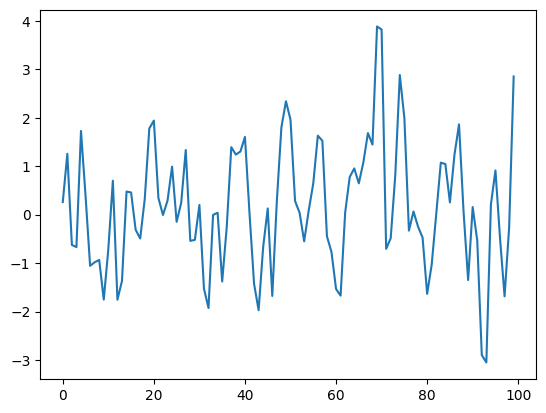

In [3]:
# symulacja szeregu
np.random.seed(128)
N=  101
e = np.random.normal(0,1,N)
ma1 = np.array([e[i]+0.9*e[i-1] for i in range(1,N)])
plt.plot(ma1)

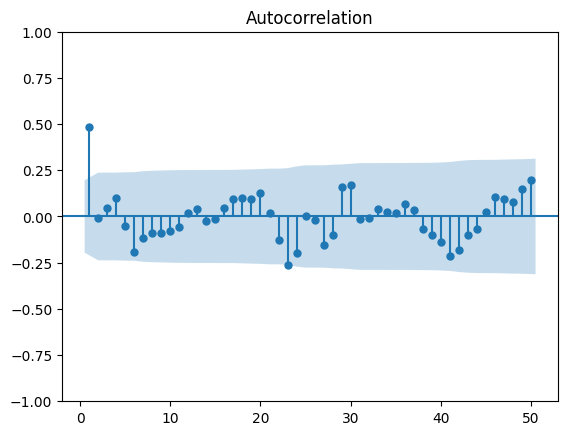

In [4]:
plot_acf(ma1,lags = 50,zero = False)
plt.show()

In [5]:
model_ma1 = ARIMA(endog = ma1,order=(0,0,1)) # model MA wywolyany jest funkcja ARIMA
# ARIMA uwzglednia szerzej (niestacjnarne modele), bo tez maja trend
# srodkowy parametr przy order 0 to z ARIMA rovbi ARMA
# ostatni parametr to jak chcemy MA(1), to order = (0,0,1) czyli MA(q) to order=(0,0,q)
model_ma1 = model_ma1.fit()
#Y_t = \mu+eps_t+theta * eps_{t-1}

In [6]:
model_ma1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                 ARIMA(0, 0, 1)   Log Likelihood                -137.091
Date:                Sun, 15 Dec 2024   AIC                            280.181
Time:                        13:16:18   BIC                            287.997
Sample:                             0   HQIC                           283.344
                                - 100                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1690      0.188      0.898      0.369      -0.200       0.538
ma.L1          0.9568      0.042     22.966      0.000       0.875       1.038
sigma2         0.8862      0.111      7.949      0.000       0.668       1.105
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 3.87
Prob(Q):                              0.89   Prob(JB):                         0.14
Heteroskedasticity (H):               2.18   Skew:                             0.35
Prob(H) (two-sided):                  0.03   Kurtosis:                         3.66
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
# testy odobne jak przy regresji liniowej
# p_value >0.05 to nieistotne

In [7]:
model_ma1 = ARIMA(endog = ma1,order=(0,0,1),trend='n') # dodanie argumentu trend = 'n', to usuwa wyraz wolny
model_ma1 = model_ma1.fit()

In [8]:
model_ma1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                 ARIMA(0, 0, 1)   Log Likelihood                -137.514
Date:                Sun, 15 Dec 2024   AIC                            279.027
Time:                        13:18:37   BIC                            284.237
Sample:                             0   HQIC                           281.136
                                - 100                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.9574      0.041     23.102      0.000       0.876       1.039
sigma2         0.8936      0.107      8.316      0.000       0.683       1.104
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 3.87
Prob(Q):                              0.89   Prob(JB):                         0.14
Heteroskedasticity (H):               2.27   Skew:                             0.35
Prob(H) (two-sided):                  0.02   Kurtosis:                         3.66
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Zadanie - model MA(2)
Wygeneruj 100 elementowy szereg MA(2): $Y_t = \varepsilon_t + 0.9 \cdot \varepsilon_{t-1} + 0.7 * \varepsilon_{t-2}$.

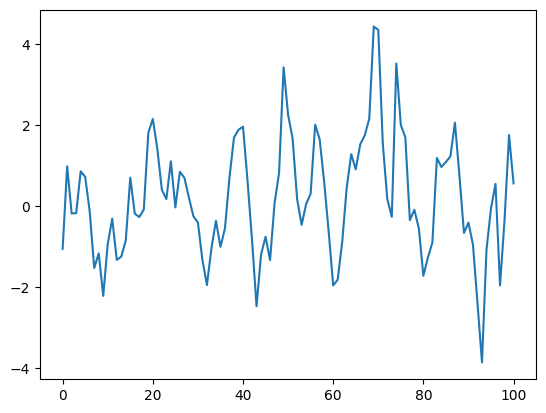

In [9]:
np.random.seed(128)
N=  102
e = np.random.normal(0,1,N)
ma2 = np.array([e[i]+0.9*e[i-1]+0.7*e[i-2] for i in range(1,N)])
plt.plot(ma2)

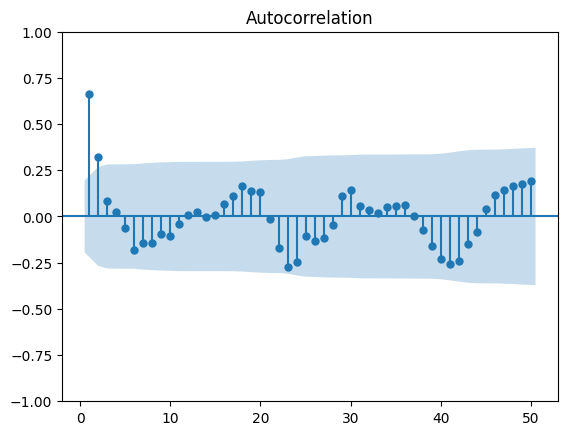

In [10]:
plot_acf(ma2,lags = 50,zero = False)
plt.show()
# raczej dwie pierwsze beda wystawac

In [15]:
model_ma2 = ARIMA(endog = ma2,order=(0,0,2))
model_ma2 = model_ma2.fit()

In [16]:
model_ma2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  101
Model:                 ARIMA(0, 0, 2)   Log Likelihood                -141.628
Date:                Sun, 15 Dec 2024   AIC                            291.257
Time:                        13:29:47   BIC                            301.717
Sample:                             0   HQIC                           295.491
                                - 101                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1294      0.299      0.434      0.665      -0.456       0.715
ma.L1          1.0081      0.078     12.905      0.000       0.855       1.161
ma.L2          0.7987      0.067     11.887      0.000       0.667       0.930
sigma2         0.9444      0.126      7.510      0.000       0.698       1.191
===================================================================================
Ljung-Box (L1) (Q):                   0.84   Jarque-Bera (JB):                 1.96
Prob(Q):                              0.36   Prob(JB):                         0.38
Heteroskedasticity (H):               1.98   Skew:                             0.27
Prob(H) (two-sided):                  0.05   Kurtosis:                         3.41
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Model autoregresji rzędu $p$ - $\text{AR}(p)$

**Modelem autoregresji rzędu $p$** nazywamy stacjonarny szereg czasowy $Y_t$ spełniający równanie:
$$Y_t = \mu+\sum_{i=1}^p \phi_i\cdot Y_{t-i} + \varepsilon_t,$$
gdzie $\phi_1, \phi_2, \ldots, \phi_p$ są współczynnikami modelu oraz $\varepsilon_t$ to biały szum.

## Zadanie - model AR(1) 

Wygeneruj 100 elementowy szereg AR(1): $Y_t = 0.8\cdot Y_{t-1} + \varepsilon_t = 0.8\cdot (0.8\cdot Y_{t-2}+\varepsilon_{t-1})+\varepsilon_{t}$. Następnie sporządź wykresy ACF i PACF.

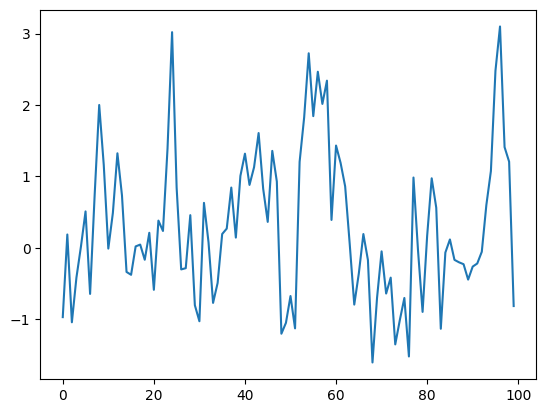

In [17]:
#szereg z procesu AR(1), nie rozpatrujemy pierwszych 100 obserwacji, aby pozbyć się wpływu punktu początkowego (musimy od jakiegoś zacząć bo w teorii AR idzie od czsu t = -oo do t = oo)
np.random.seed(128)
N = 201
e = np.random.normal(0,1,N)
ar1 = np.zeros(N)
for i in range(1,N):
  ar1[i] = 0.8*ar1[i-1]+e[i]
ar1 = ar1[101:]
plt.plot(ar1)
plt.show()

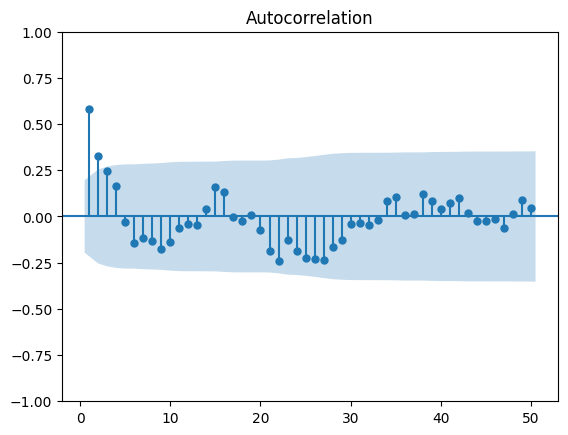

In [18]:
plot_acf(ar1,lags = 50,zero = False)
plt.show()

In [ ]:
# wystaja dwie kreski i teoretycznie moznaby powiedziec wezmy model MA(2) 
# ale my wiemy ze to jest szereg wygenerowany z procesu AR

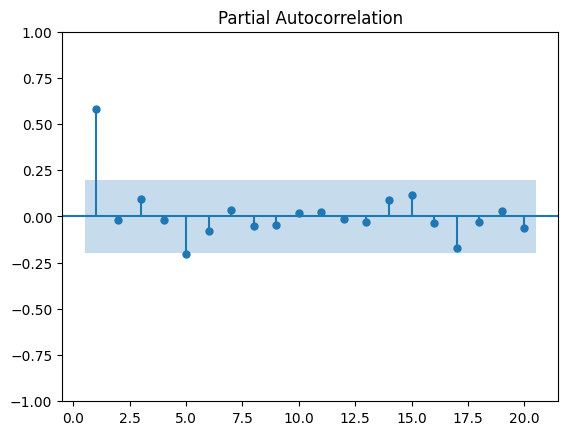

In [19]:
# dla AR sprawdzamy pacf
plot_pacf(ar1,lags = 20,zero = False)
plt.show()

In [21]:
model_ar1 = ARIMA(endog = ar1,order=(1,0,0))
model_ar1 = model_ar1.fit()

In [22]:
model_ar1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -123.463
Date:                Sun, 15 Dec 2024   AIC                            252.926
Time:                        13:42:45   BIC                            260.742
Sample:                             0   HQIC                           256.089
                                - 100                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2705      0.207      1.306      0.192      -0.136       0.677
ar.L1          0.5939      0.077      7.681      0.000       0.442       0.745
sigma2         0.6887      0.106      6.527      0.000       0.482       0.895
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                 0.79
Prob(Q):                              0.85   Prob(JB):                         0.67
Heteroskedasticity (H):               1.08   Skew:                             0.17
Prob(H) (two-sided):                  0.82   Kurtosis:                         2.73
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
# model_ar1 = ARIMA(endog = ar1,order=(1,0,0),trend='n')
# model_ar1 = model_ar1.fit()

In [ ]:
# model_ar1.summary()

## Zadanie - model AR(2) 

Wygeneruj 100 elementowy szereg AR(2): $Y_t = 0.7\cdot Y_{t-2} + 0.8\cdot Y_{t-1} + \varepsilon_t$. Następnie sporządź wykresy ACF i PACF.

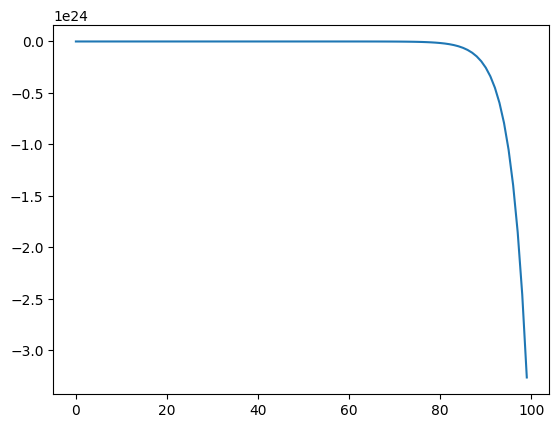

In [27]:
N = 202
e = np.random.normal(0,1,N)
ar2 = np.zeros(N)
for i in range(2,N):
  ar2[i] = 0.8*ar2[i-1]+0.7*ar2[i-2]+e[i]
ar2 = ar2[102:]
plt.plot(ar2)
plt.show()
# to jest proces niestacjonarny! mimo ze generownay na taki
# tutaj kwestia wspolczynnikow, ktore nie spelniaja pewnych warunkow

## Model autoregresji ruchomej średniej - $\text{ARMA}(p, q)$

**Modelem autoregresji ruchomej średniej** nazywamy stacjonarny szereg czasowy $Y_t$ spełniający równanie:
$$Y_t = \mu+\sum_{i=1}^p \phi_i\cdot Y_{t-i} + \sum_{j=1}^q \theta_j \cdot \varepsilon_{t-j} + \varepsilon_t,$$
gdzie $\phi_1, \phi_2, \ldots, \phi_p$ oraz  $\theta_1, \theta_2, \ldots, \theta_{q}$ są współczynnikami modelu oraz $\varepsilon_t$ to biały szum.

## Zadanie - model ARMA(1, 1)
Wygeneruj 100 elementowy szereg ARMA(1, 1): $Y_t = 0.7\cdot Y_{t-1} + 0.8\cdot \varepsilon_{t-1} + \varepsilon_t$. Następnie sporządź wykresy ACF i PACF.

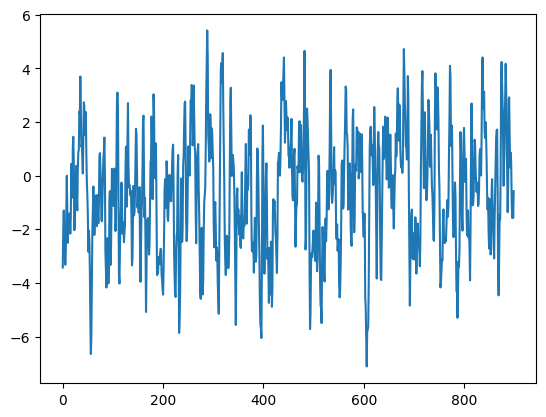

In [28]:
np.random.seed(129)
N5 = 1001
e = np.random.normal(0,1,N5)
arma = 10*np.ones(N5)
for i in range(1,N5):
    arma[i] = 0.7*arma[i-1]+0.8*e[i-1]+e[i]
arma = arma[101:]
plt.plot(arma)
plt.show()

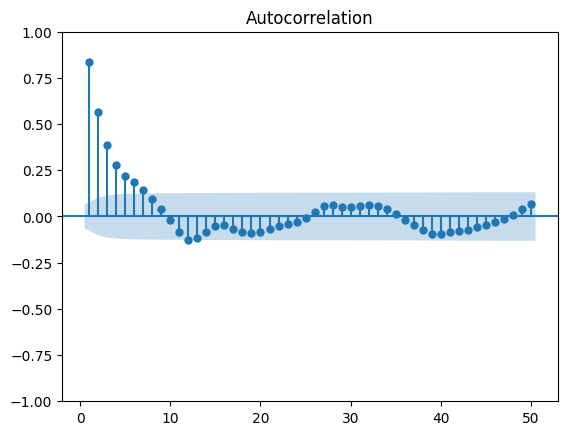

In [29]:
plot_acf(arma,lags = 50,zero = False)
plt.show()

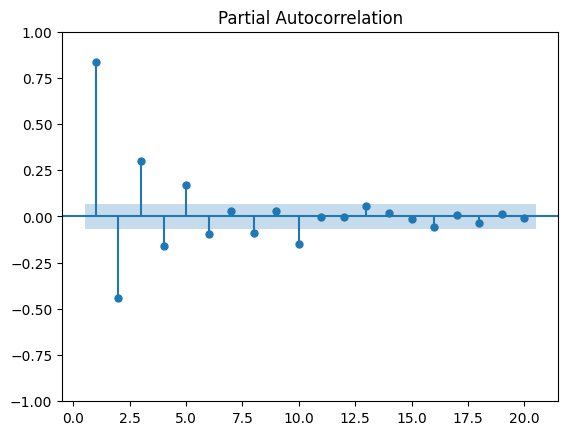

In [30]:
plot_pacf(arma,lags = 20,zero = False)
plt.show()

In [33]:
model_arma = ARIMA(endog = arma,order=(10,0,7),trend='n')
model_arma = model_arma.fit()

C:\Users\Ola\OneDrive\PYTHON\SAGES\ZJAZDY-MATERIALY\ZJAZDY13-14\RegularyzacjaRegresjaSzeregi_Fork\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [34]:
model_arma.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  900
Model:                ARIMA(10, 0, 7)   Log Likelihood               -1251.938
Date:                Sun, 15 Dec 2024   AIC                           2539.877
Time:                        14:35:20   BIC                           2626.320
Sample:                             0   HQIC                          2572.899
                                - 900                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          2.3902      0.572      4.179      0.000       1.269       3.511
ar.L2         -3.0656      1.397     -2.194      0.028      -5.804      -0.327
ar.L3          2.2554      1.752      1.288      0.198      -1.178       5.688
ar.L4         -1.0081      1.241     -0.812      0.417      -3.440       1.424
ar.L5          0.0737      0.690      0.107      0.915      -1.279       1.426
ar.L6          0.5407      0.699      0.774      0.439      -0.829       1.910
ar.L7         -0.8839      0.655     -1.350      0.177      -2.167       0.399
ar.L8          0.7625      0.496      1.537      0.124      -0.210       1.735
ar.L9         -0.3356      0.294     -1.141      0.254      -0.912       0.241
ar.L10         0.0657      0.107      0.614      0.539      -0.144       0.276
ma.L1         -0.9189      0.568     -1.619      0.106      -2.032       0.194
ma.L2          0.5630      0.579      0.972      0.331      -0.572       1.698
ma.L3          0.5285      0.350      1.511      0.131      -0.157       1.214
ma.L4         -0.3757      0.562     -0.668      0.504      -1.478       0.727
ma.L5          0.4541      0.514      0.884      0.377      -0.552       1.461
ma.L6         -0.2820      0.301     -0.938      0.348      -0.871       0.307
ma.L7          0.3598      0.187      1.919      0.055      -0.008       0.727
sigma2         0.9426      0.048     19.588      0.000       0.848       1.037
===================================================================================
Ljung-Box (L1) (Q):                   0.09   Jarque-Bera (JB):                 1.88
Prob(Q):                              0.77   Prob(JB):                         0.39
Heteroskedasticity (H):               0.96   Skew:                            -0.02
Prob(H) (two-sided):                  0.70   Kurtosis:                         2.78
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Zadanie - model ARMA(2, 1)
Wygeneruj 100 elementowy szereg ARMA(2, 1): $Y_t = 0.5\cdot Y_{t-2} + 0.7\cdot Y_{t-1} + 0.8\cdot \varepsilon_{t-1} + \varepsilon_t$. Następnie sporządź wykresy ACF i PACF.

## Zadanie - szereg z trendem
Wygeneruj 100 elementowy szereg: $Y_t = t+0.7\cdot Y_{t-1} + 0.8\cdot \varepsilon_{t-1} + \varepsilon_t$. Następnie sporządź wykresy ACF i PACF.
Zamodeluj szereg na podstawie analizy ACF i PACF.

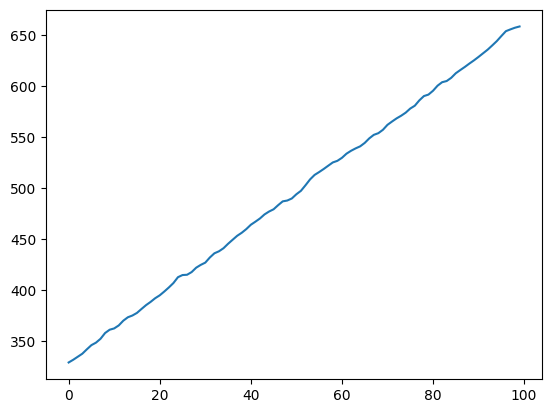

In [35]:
np.random.seed(128)
N5 = 201
e = np.random.normal(0,1,N5)
arima = 10*np.ones(N5)
for i in range(1,N5):
    arima[i] = i+0.7*arima[i-1]+0.8*e[i-1]+e[i]
arima = arima[101:]
plt.plot(arima)
plt.show() #jest trend

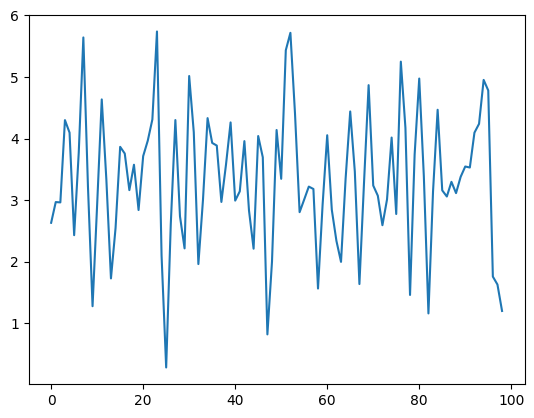

In [36]:
# robie roznicowanie i uzyskuje szwereg stacjonarny
arima_diff = arima[1:]-arima[:(len(arima)-1)]
plt.plot(arima_diff)

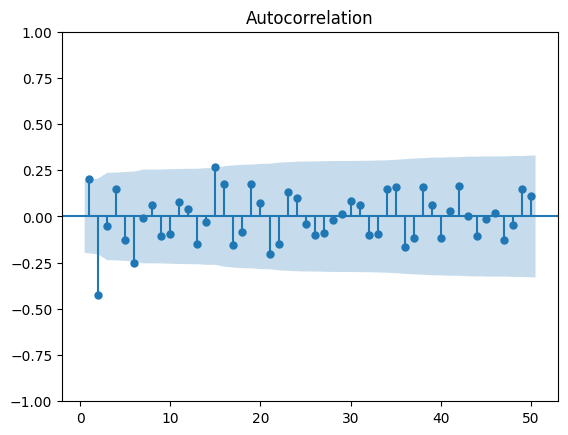

In [37]:
plot_acf(arima_diff,lags = 50,zero = False)
plt.show()

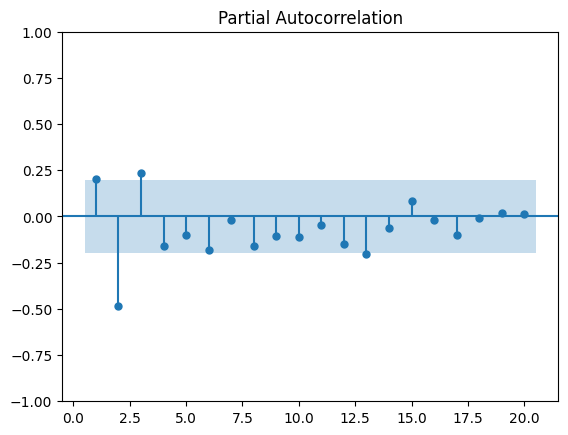

In [38]:
plot_pacf(arima_diff,lags = 20,zero = False)
plt.show()

In [40]:
model_arima_diff = ARIMA(endog = arima_diff,order=(2,0,2))
model_arima_diff = model_arima_diff.fit()

C:\Users\Ola\OneDrive\PYTHON\SAGES\ZJAZDY-MATERIALY\ZJAZDY13-14\RegularyzacjaRegresjaSzeregi_Fork\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [43]:
model_arima_diff.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   99
Model:                 ARIMA(2, 0, 2)   Log Likelihood                -122.621
Date:                Sun, 15 Dec 2024   AIC                            257.242
Time:                        14:45:40   BIC                            272.813
Sample:                             0   HQIC                           263.542
                                 - 99                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.3303      0.010    345.239      0.000       3.311       3.349
ar.L1          0.5058      0.126      4.025      0.000       0.259       0.752
ar.L2         -0.0406      0.144     -0.282      0.778      -0.322       0.241
ma.L1         -0.1434     29.386     -0.005      0.996     -57.740      57.453
ma.L2         -0.8565     25.180     -0.034      0.973     -50.209      48.496
sigma2         0.6664     19.591      0.034      0.973     -37.730      39.063
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 1.17
Prob(Q):                              0.98   Prob(JB):                         0.56
Heteroskedasticity (H):               1.20   Skew:                             0.26
Prob(H) (two-sided):                  0.60   Kurtosis:                         2.85
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [42]:
model_arima = ARIMA(endog = arima,order=(2,1,2),trend = 't') # 1 oznacza przed dopasowaniem ma zrobic roznicowanie o 1
model_arima = model_arima.fit()
# ultra mega wazne zeby pamietaco o tym trend='t' jak mamy sam trend do usuniecia bez sezonowosci

C:\Users\Ola\OneDrive\PYTHON\SAGES\ZJAZDY-MATERIALY\ZJAZDY13-14\RegularyzacjaRegresjaSzeregi_Fork\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [44]:
model_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -122.621
Date:                Sun, 15 Dec 2024   AIC                            257.243
Time:                        14:45:57   BIC                            272.813
Sample:                             0   HQIC                           263.543
                                - 100                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             3.3303      0.010    345.317      0.000       3.311       3.349
ar.L1          0.5058      0.126      4.026      0.000       0.260       0.752
ar.L2         -0.0407      0.144     -0.283      0.777      -0.322       0.241
ma.L1         -0.1433     10.206     -0.014      0.989     -20.148      19.861
ma.L2         -0.8565      8.753     -0.098      0.922     -18.012      16.299
sigma2         0.6664      6.810      0.098      0.922     -12.680      14.013
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 1.17
Prob(Q):                              0.98   Prob(JB):                         0.56
Heteroskedasticity (H):               1.20   Skew:                             0.26
Prob(H) (two-sided):                  0.60   Kurtosis:                         2.85
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Zadanie - szereg z sezonem i trendem
Wygeneruj 100 elementowy szereg: $Y_t = t+t$	mod $12 +0.7\cdot Y_{t-1} + 0.8\cdot \varepsilon_{t-1} + \varepsilon_t$.
gdzie $t$ mod $12$ oznacza dzielenie modulo (resztę z dzielenia) $t$ przez $12$.
Następnie sporządź wykresy ACF i PACF.
Zamodeluj szereg na podstawie analizy ACF i PACF.

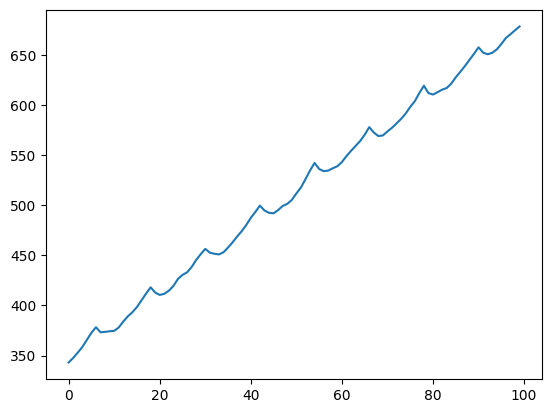

In [45]:
np.random.seed(128)
N5 = 201
e = np.random.normal(0,1,N5)
arima = 10*np.ones(N5)
for i in range(1,N5):
    arima[i] = i+i%12+0.7*arima[i-1]+0.8*e[i-1]+e[i]
arima = arima[101:]
plt.plot(arima)
plt.show() #jest trend i sezonowość

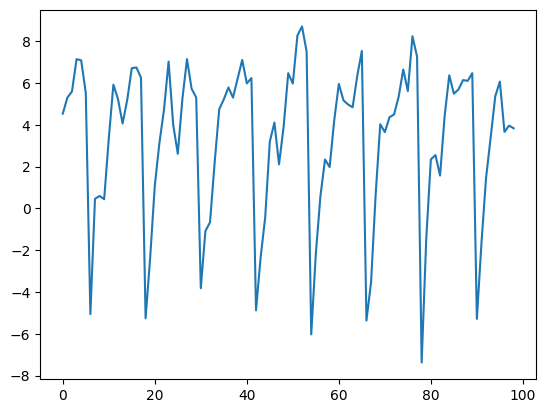

In [46]:
#różnicujemy w celu pozbycia się trendu
arima_diff = arima[1:]-arima[:(len(arima)-1)]
plt.plot(arima_diff)
plt.show() #patrzymy na szereg zróżnicowany, ale jest sezonowość

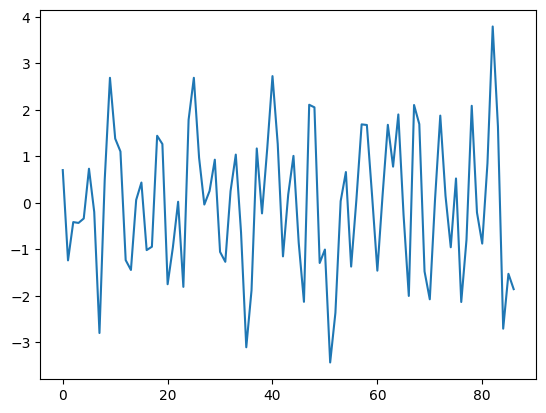

In [47]:
#różnicujemy o 12 celem pozbysia się sezonowości
arima_diff_12 = arima_diff[12:]-arima_diff[:(len(arima_diff)-12)]
plt.plot(arima_diff_12)
plt.show() #jest stacjonarny

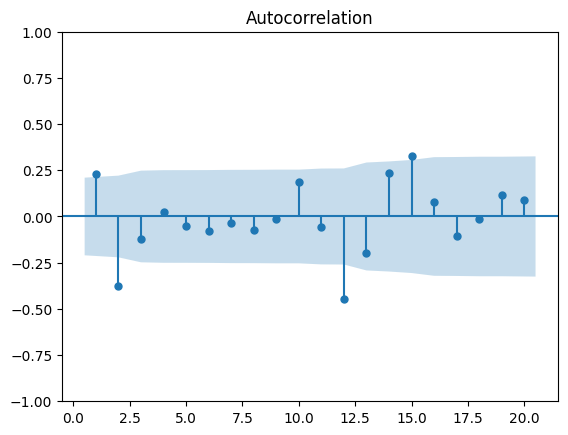

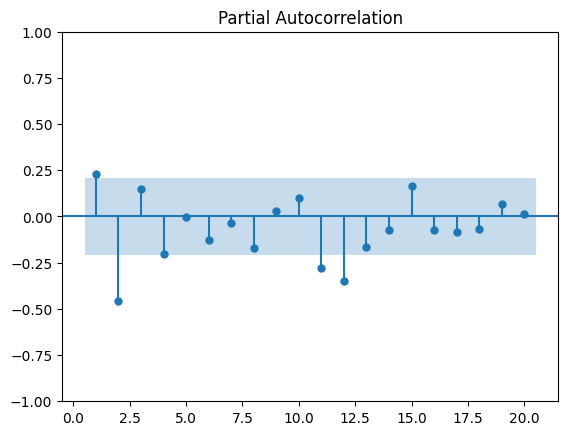

In [48]:
#analiza pacfów i acfów
plot_acf(arima_diff_12,lags = 20,zero = False)
plot_pacf(arima_diff_12,lags = 20,zero = False)
plt.show()

In [49]:
m1 = ARIMA(endog=arima_diff_12, order=(4, 0, 2)).fit()

C:\Users\Ola\OneDrive\PYTHON\SAGES\ZJAZDY-MATERIALY\ZJAZDY13-14\RegularyzacjaRegresjaSzeregi_Fork\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [50]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
m2 = SARIMAX(endog=arima, order=(4, 1, 2),seasonal_order = (0,1,0,12), trend='c').fit()

C:\Users\Ola\OneDrive\PYTHON\SAGES\ZJAZDY-MATERIALY\ZJAZDY13-14\RegularyzacjaRegresjaSzeregi_Fork\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [51]:
m2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  100
Model:             SARIMAX(4, 1, 2)x(0, 1, [], 12)   Log Likelihood                -136.261
Date:                             Sun, 15 Dec 2024   AIC                            288.521
Time:                                     14:50:10   BIC                            308.249
Sample:                                          0   HQIC                           296.465
                                             - 100                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0022      0.010      0.212      0.832      -0.018       0.022
ar.L1          0.4125      0.127      3.239      0.001       0.163       0.662
ar.L2          0.1245      0.168      0.741      0.459      -0.205       0.454
ar.L3         -0.0947      0.152     -0.625      0.532      -0.392       0.202
ar.L4          0.0845      0.138      0.613      0.540      -0.186       0.355
ma.L1         -0.0014   1875.211  -7.45e-07      1.000   -3675.347    3675.344
ma.L2         -0.9986   1872.521     -0.001      1.000   -3671.073    3669.076
sigma2         1.2458   2335.970      0.001      1.000   -4577.171    4579.663
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 0.68
Prob(Q):                              0.92   Prob(JB):                         0.71
Heteroskedasticity (H):               1.34   Skew:                             0.16
Prob(H) (two-sided):                  0.43   Kurtosis:                         3.28
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [52]:
m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   87
Model:                 ARIMA(4, 0, 2)   Log Likelihood                -136.260
Date:                Sun, 15 Dec 2024   AIC                            288.519
Time:                        14:50:13   BIC                            308.247
Sample:                             0   HQIC                           296.463
                                 - 87                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0046      0.018      0.250      0.803      -0.031       0.041
ar.L1          0.4124      0.126      3.274      0.001       0.165       0.659
ar.L2          0.1247      0.163      0.766      0.444      -0.194       0.444
ar.L3         -0.0950      0.151     -0.628      0.530      -0.392       0.202
ar.L4          0.0848      0.123      0.688      0.491      -0.157       0.326
ma.L1      -5.247e-05     37.219  -1.41e-06      1.000     -72.947      72.947
ma.L2         -0.9999     14.629     -0.068      0.946     -29.672      27.672
sigma2         1.2439     18.162      0.068      0.945     -34.353      36.841
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 0.68
Prob(Q):                              0.91   Prob(JB):                         0.71
Heteroskedasticity (H):               1.34   Skew:                             0.16
Prob(H) (two-sided):                  0.43   Kurtosis:                         3.28
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.05e+16. Standard errors may be unstable.
"""